In [1]:
"""
REGRESIÓN LOGÍSTICA DESDE CERO (SCRATCH)
=======================================

Objetivos:
- Comprender la regresión logística a través de implementación scratch
- Aprender conceptos básicos de problemas de clasificación
- Implementar función sigmoide y descenso de gradiente
- Comparar con implementaciones de scikit-learn

Sprint: Algoritmos de clasificación desde fundamentos
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("REGRESIÓN LOGÍSTICA DESDE CERO")
print("Implementación Scratch para Clasificación Binaria")
print("="*80)


REGRESIÓN LOGÍSTICA DESDE CERO
Implementación Scratch para Clasificación Binaria


In [2]:
# ============================================================================
# 1. FUNDAMENTOS TEÓRICOS DE REGRESIÓN LOGÍSTICA
# ============================================================================

print("📚 1. FUNDAMENTOS TEÓRICOS")
print("="*30)

print("""
🎯 REGRESIÓN LOGÍSTICA:
──────────────────────

📊 FUNCIÓN SIGMOIDE:
   g(z) = 1 / (1 + e^(-z))
   
   Propiedades:
   • Rango: (0, 1) - perfecto para probabilidades
   • Diferenciable en todo su dominio
   • Forma de S suave

📈 FUNCIÓN DE HIPÓTESIS:
   h_θ(x) = g(θ^T · x) = 1 / (1 + e^(-θ^T · x))
   
   Donde:
   • x: vector de características [x₀, x₁, x₂, ..., xₙ] (x₀ = 1 para bias)
   • θ: vector de parámetros [θ₀, θ₁, θ₂, ..., θₙ]
   • Salida: probabilidad P(y=1|x)

📉 FUNCIÓN DE COSTO (Cross-Entropy + Regularización):
   J(θ) = (1/m) * Σᵢ₌₁ᵐ [-y⁽ⁱ⁾log(h_θ(x⁽ⁱ⁾)) - (1-y⁽ⁱ⁾)log(1-h_θ(x⁽ⁱ⁾))]
          + (λ/2m) * Σⱼ₌₁ⁿ θⱼ²
   
   Componentes:
   • Primer término: Cross-entropy loss
   • Segundo término: Regularización L2 (Ridge)

🔄 DESCENSO DE GRADIENTE:
   θ₀ := θ₀ - α * (1/m) * Σᵢ₌₁ᵐ (h_θ(x⁽ⁱ⁾) - y⁽ⁱ⁾)     [Bias sin regularización]
   θⱼ := θⱼ - α * [(1/m) * Σᵢ₌₁ᵐ (h_θ(x⁽ⁱ⁾) - y⁽ⁱ⁾)xⱼ⁽ⁱ⁾ + (λ/m)θⱼ]   [j ≥ 1]
   
   Donde:
   • α: tasa de aprendizaje
   • λ: parámetro de regularización
   • m: número de muestras

💡 DIFERENCIAS CON REGRESIÓN LINEAL:
   • Función de activación sigmoide
   • Función de costo logarítmica (no cuadrática)
   • Salida interpretable como probabilidad
   • Problema de clasificación (no regresión)
""")

print("✅ Fundamentos teóricos establecidos")


📚 1. FUNDAMENTOS TEÓRICOS

🎯 REGRESIÓN LOGÍSTICA:
──────────────────────

📊 FUNCIÓN SIGMOIDE:
   g(z) = 1 / (1 + e^(-z))
   
   Propiedades:
   • Rango: (0, 1) - perfecto para probabilidades
   • Diferenciable en todo su dominio
   • Forma de S suave

📈 FUNCIÓN DE HIPÓTESIS:
   h_θ(x) = g(θ^T · x) = 1 / (1 + e^(-θ^T · x))
   
   Donde:
   • x: vector de características [x₀, x₁, x₂, ..., xₙ] (x₀ = 1 para bias)
   • θ: vector de parámetros [θ₀, θ₁, θ₂, ..., θₙ]
   • Salida: probabilidad P(y=1|x)

📉 FUNCIÓN DE COSTO (Cross-Entropy + Regularización):
   J(θ) = (1/m) * Σᵢ₌₁ᵐ [-y⁽ⁱ⁾log(h_θ(x⁽ⁱ⁾)) - (1-y⁽ⁱ⁾)log(1-h_θ(x⁽ⁱ⁾))]
          + (λ/2m) * Σⱼ₌₁ⁿ θⱼ²
   
   Componentes:
   • Primer término: Cross-entropy loss
   • Segundo término: Regularización L2 (Ridge)

🔄 DESCENSO DE GRADIENTE:
   θ₀ := θ₀ - α * (1/m) * Σᵢ₌₁ᵐ (h_θ(x⁽ⁱ⁾) - y⁽ⁱ⁾)     [Bias sin regularización]
   θⱼ := θⱼ - α * [(1/m) * Σᵢ₌₁ᵐ (h_θ(x⁽ⁱ⁾) - y⁽ⁱ⁾)xⱼ⁽ⁱ⁾ + (λ/m)θⱼ]   [j ≥ 1]
   
   Donde:
   • α: tasa de aprendizaje
   • λ: 

In [3]:
# ============================================================================
# 2. IMPLEMENTACIÓN DE LA CLASE ScratchLogisticRegression
# ============================================================================

print("\n🏗️ 2. CLASE ScratchLogisticRegression")
print("="*40)

class ScratchLogisticRegression():
    """
    Implementación desde cero de Regresión Logística con regularización L2
    
    Parameters
    ----------
    num_iter : int, default=1000
        Número de iteraciones para el descenso de gradiente
    lr : float, default=0.01
        Tasa de aprendizaje (learning rate)
    no_bias : bool, default=False
        Si True, no incluye término de bias (intercepción)
    verbose : bool, default=False
        Si True, imprime progreso durante entrenamiento
    reg_lambda : float, default=0.0
        Parámetro de regularización L2 (lambda)
    
    Attributes
    ----------
    coef_ : ndarray, shape (n_features,)
        Coeficientes del modelo (parámetros θ)
    loss : ndarray, shape (num_iter,)
        Historia de la pérdida en datos de entrenamiento
    val_loss : ndarray, shape (num_iter,)
        Historia de la pérdida en datos de validación
    """
    
    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False, reg_lambda=0.0):
        # Validar parámetros
        if num_iter <= 0:
            raise ValueError("num_iter debe ser positivo")
        if lr <= 0:
            raise ValueError("lr debe ser positivo")
        if reg_lambda < 0:
            raise ValueError("reg_lambda debe ser no negativo")
            
        # Guardar hiperparámetros
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.reg_lambda = reg_lambda
        
        # Inicializar arrays para historial de pérdidas
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        # Inicializar coeficientes (se definirá en fit)
        self.coef_ = None
        
    def _add_bias_column(self, X):
        """
        Agrega columna de bias (unos) al principio de la matriz X
        """
        if self.no_bias:
            return X
        
        bias_column = np.ones((X.shape[0], 1))
        return np.column_stack([bias_column, X])
    
    def _sigmoid(self, z):
        """
        Función sigmoide: g(z) = 1 / (1 + e^(-z))
        
        Implementación estable numéricamente para evitar overflow
        """
        # Clip z para evitar overflow
        z = np.clip(z, -500, 500)
        
        # Implementación estable
        positive = z >= 0
        negative = ~positive
        
        result = np.zeros_like(z, dtype=np.float64)
        
        # Para z >= 0: sigmoid(z) = 1 / (1 + exp(-z))
        result[positive] = 1.0 / (1.0 + np.exp(-z[positive]))
        
        # Para z < 0: sigmoid(z) = exp(z) / (1 + exp(z))
        exp_z = np.exp(z[negative])
        result[negative] = exp_z / (1.0 + exp_z)
        
        return result
    
    def _hypothesis(self, X):
        """
        Función de hipótesis: h_θ(x) = sigmoid(θ^T · x)
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Datos de entrada (ya con bias si corresponde)
            
        Returns
        -------
        predictions : ndarray, shape (n_samples, 1)
            Probabilidades predichas P(y=1|x)
        """
        z = X @ self.coef_
        return self._sigmoid(z).reshape(-1, 1)
    
    def _compute_cost(self, X, y):
        """
        Calcula la función de costo con regularización L2
        
        J(θ) = (1/m) * Σ[-y*log(h_θ(x)) - (1-y)*log(1-h_θ(x))] + (λ/2m) * Σθⱼ²
        """
        m = X.shape[0]
        h = self._hypothesis(X).flatten()
        
        # Evitar log(0) agregando pequeño epsilon
        epsilon = 1e-15
        h = np.clip(h, epsilon, 1 - epsilon)
        
        # Término de cross-entropy
        cross_entropy = -(y * np.log(h) + (1 - y) * np.log(1 - h))
        
        # Término de regularización (excluir bias si existe)
        reg_term = 0
        if self.reg_lambda > 0:
            if self.no_bias:
                # Regularizar todos los coeficientes
                reg_term = (self.reg_lambda / (2 * m)) * np.sum(self.coef_ ** 2)
            else:
                # Excluir bias (primer coeficiente) de regularización
                reg_term = (self.reg_lambda / (2 * m)) * np.sum(self.coef_[1:] ** 2)
        
        return np.mean(cross_entropy) + reg_term
    
    def _gradient_descent(self, X, y):
        """
        Actualiza los parámetros usando descenso de gradiente con regularización
        
        θ₀ := θ₀ - α * (1/m) * Σ(h_θ(x) - y)                    [Bias]
        θⱼ := θⱼ - α * [(1/m) * Σ(h_θ(x) - y)xⱼ + (λ/m)θⱼ]    [j ≥ 1]
        """
        m = X.shape[0]
        h = self._hypothesis(X).flatten()
        error = h - y
        
        # Calcular gradientes base
        gradients = (1/m) * (X.T @ error)
        
        # Aplicar regularización (excluir bias)
        if self.reg_lambda > 0 and not self.no_bias:
            # Regularizar solo coeficientes, no bias
            reg_gradients = (self.reg_lambda / m) * self.coef_
            reg_gradients[0] = 0  # No regularizar bias
            gradients = gradients + reg_gradients
        elif self.reg_lambda > 0 and self.no_bias:
            # Regularizar todos los coeficientes si no hay bias
            reg_gradients = (self.reg_lambda / m) * self.coef_
            gradients = gradients + reg_gradients
        
        # Actualizar parámetros
        self.coef_ = self.coef_ - self.lr * gradients
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Entrena el modelo de regresión logística
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Características de entrenamiento
        y : ndarray, shape (n_samples,)
            Etiquetas de entrenamiento (0 o 1)
        X_val : ndarray, optional
            Características de validación
        y_val : ndarray, optional
            Etiquetas de validación
        """
        # Validar y convertir inputs
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        if y.ndim != 1:
            raise ValueError("y debe ser un vector 1D")
        if X.shape[0] != y.shape[0]:
            raise ValueError("X e y deben tener el mismo número de muestras")
        
        # Verificar que y contiene solo 0s y 1s
        unique_y = np.unique(y)
        if not np.array_equal(np.sort(unique_y), [0, 1]):
            raise ValueError("y debe contener solo valores 0 y 1")
        
        # Preparar datos
        X_with_bias = self._add_bias_column(X)
        n_features = X_with_bias.shape[1]
        
        # Validar datos de validación si se proporcionan
        has_validation = X_val is not None and y_val is not None
        if has_validation:
            X_val = np.asarray(X_val, dtype=np.float64)
            y_val = np.asarray(y_val, dtype=np.float64)
            X_val_with_bias = self._add_bias_column(X_val)
        
        # Inicializar parámetros con valores pequeños aleatorios
        self.coef_ = np.random.normal(0, 0.01, n_features)
        
        if self.verbose:
            print(f"🏃‍♂️ Iniciando entrenamiento de regresión logística:")
            print(f"   • Muestras: {X.shape[0]}, Características: {X.shape[1]}")
            print(f"   • Iteraciones: {self.iter}")
            print(f"   • Learning rate: {self.lr}")
            print(f"   • Regularización λ: {self.reg_lambda}")
            print(f"   • Bias incluido: {not self.no_bias}")
            if has_validation:
                print(f"   • Muestras de validación: {X_val.shape[0]}")
        
        # Bucle de entrenamiento
        for i in range(self.iter):
            # Calcular y guardar costo de entrenamiento
            self.loss[i] = self._compute_cost(X_with_bias, y)
            
            # Calcular costo de validación si existe
            if has_validation:
                self.val_loss[i] = self._compute_cost(X_val_with_bias, y_val)
            
            # Actualizar parámetros
            self._gradient_descent(X_with_bias, y)
            
            # Imprimir progreso
            if self.verbose and (i % (self.iter // 10) == 0 or i == self.iter - 1):
                val_text = f", Val Loss: {self.val_loss[i]:.6f}" if has_validation else ""
                print(f"   Iteración {i+1:4d}: Loss: {self.loss[i]:.6f}{val_text}")
        
        if self.verbose:
            print("✅ Entrenamiento completado")
            print(f"   • Costo final: {self.loss[-1]:.6f}")
    
    def predict_proba(self, X):
        """
        Predice probabilidades de clase positiva
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Datos para hacer predicciones
            
        Returns
        -------
        probabilities : ndarray, shape (n_samples,)
            Probabilidades P(y=1|x)
        """
        if self.coef_ is None:
            raise ValueError("El modelo debe ser entrenado antes de predecir. Usa fit() primero.")
        
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        
        X_with_bias = self._add_bias_column(X)
        return self._hypothesis(X_with_bias).flatten()
    
    def predict(self, X, threshold=0.5):
        """
        Predice etiquetas de clase usando umbral
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Datos para hacer predicciones
        threshold : float, default=0.5
            Umbral para clasificación binaria
            
        Returns
        -------
        predictions : ndarray, shape (n_samples,)
            Etiquetas predichas (0 o 1)
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def save_weights(self, filepath):
        """Guarda los pesos del modelo usando pickle"""
        if self.coef_ is None:
            raise ValueError("No hay pesos para guardar. Entrena el modelo primero.")
        
        model_data = {
            'coef_': self.coef_,
            'hyperparameters': {
                'iter': self.iter,
                'lr': self.lr,
                'no_bias': self.no_bias,
                'reg_lambda': self.reg_lambda
            },
            'loss_history': self.loss,
            'val_loss_history': self.val_loss
        }
        
        with open(filepath, 'wb') as f:
            pickle.dump(model_data, f)
        
        print(f"✅ Modelo guardado en: {filepath}")
    
    def load_weights(self, filepath):
        """Carga los pesos del modelo usando pickle"""
        with open(filepath, 'rb') as f:
            model_data = pickle.load(f)
        
        self.coef_ = model_data['coef_']
        self.loss = model_data['loss_history']
        self.val_loss = model_data['val_loss_history']
        
        # Restaurar hiperparámetros si están disponibles
        if 'hyperparameters' in model_data:
            hyp = model_data['hyperparameters']
            self.iter = hyp['iter']
            self.lr = hyp['lr']
            self.no_bias = hyp['no_bias']
            self.reg_lambda = hyp['reg_lambda']
        
        print(f"✅ Modelo cargado desde: {filepath}")

print("🏗️ Clase ScratchLogisticRegression implementada completamente")

# Información sobre la implementación
print(f"\n📋 CARACTERÍSTICAS DE LA IMPLEMENTACIÓN:")
print(f"   • ✅ Función sigmoide con estabilidad numérica")
print(f"   • ✅ Función de hipótesis logística")
print(f"   • ✅ Función de costo con cross-entropy + regularización L2")
print(f"   • ✅ Descenso de gradiente con regularización")
print(f"   • ✅ Predicción de probabilidades (predict_proba)")
print(f"   • ✅ Predicción de etiquetas con umbral (predict)")
print(f"   • ✅ Guardado/carga de modelos con pickle")
print(f"   • ✅ Validación durante entrenamiento")
print(f"   • ✅ Manejo robusto de edge cases numéricos")

print("✅ Implementación completa de regresión logística scratch")



🏗️ 2. CLASE ScratchLogisticRegression
🏗️ Clase ScratchLogisticRegression implementada completamente

📋 CARACTERÍSTICAS DE LA IMPLEMENTACIÓN:
   • ✅ Función sigmoide con estabilidad numérica
   • ✅ Función de hipótesis logística
   • ✅ Función de costo con cross-entropy + regularización L2
   • ✅ Descenso de gradiente con regularización
   • ✅ Predicción de probabilidades (predict_proba)
   • ✅ Predicción de etiquetas con umbral (predict)
   • ✅ Guardado/carga de modelos con pickle
   • ✅ Validación durante entrenamiento
   • ✅ Manejo robusto de edge cases numéricos
✅ Implementación completa de regresión logística scratch



🌸 3. PREPARACIÓN DE DATOS - IRIS
📊 DATASET IRIS COMPLETO:
   • Muestras totales: 150
   • Características: 4
   • Clases: 3 - ['setosa' 'versicolor' 'virginica']
   • Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

🎯 PREPARANDO CLASIFICACIÓN BINARIA:
   • Clases seleccionadas: Versicolor vs Virginica
   • Excluir: Setosa (clase 0)
   • Muestras después del filtrado: 100
   • Distribución de clases:
     - Versicolor (etiqueta 0): 50 muestras (50.0%)
     - Virginica (etiqueta 1): 50 muestras (50.0%)

📊 DATASET 2D PARA VISUALIZACIÓN:
   • Características seleccionadas: ['sepal width (cm)', 'petal length (cm)']
   • Forma del dataset 2D: (100, 2)


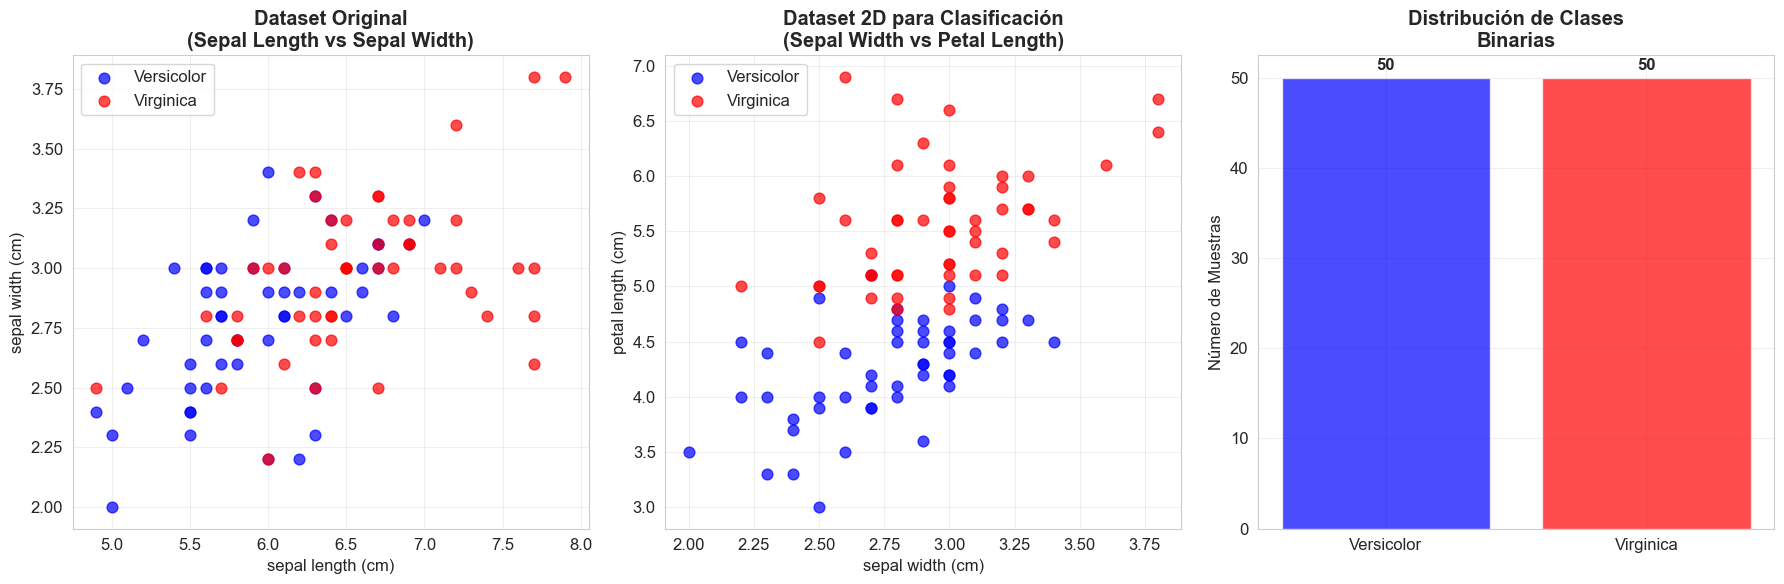

✅ Datos de Iris preparados para clasificación binaria


In [4]:
# ============================================================================
# 3. PREPARACIÓN DE DATOS - DATASET IRIS
# ============================================================================

print("\n🌸 3. PREPARACIÓN DE DATOS - IRIS")
print("="*35)

# Cargar dataset Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"📊 DATASET IRIS COMPLETO:")
print(f"   • Muestras totales: {X_iris.shape[0]}")
print(f"   • Características: {X_iris.shape[1]}")
print(f"   • Clases: {len(target_names)} - {target_names}")
print(f"   • Características: {feature_names}")

# Crear dataset de clasificación binaria: Versicolor (1) vs Virginica (2)
print(f"\n🎯 PREPARANDO CLASIFICACIÓN BINARIA:")
print(f"   • Clases seleccionadas: Versicolor vs Virginica")
print(f"   • Excluir: Setosa (clase 0)")

# Filtrar solo clases 1 y 2
binary_mask = (y_iris == 1) | (y_iris == 2)
X_binary = X_iris[binary_mask]
y_binary = y_iris[binary_mask]

# Convertir etiquetas a 0 y 1 (Versicolor=0, Virginica=1)
y_binary = y_binary - 1

binary_class_names = ['Versicolor', 'Virginica']

print(f"   • Muestras después del filtrado: {X_binary.shape[0]}")
print(f"   • Distribución de clases:")
unique, counts = np.unique(y_binary, return_counts=True)
for i, (label, count) in enumerate(zip(binary_class_names, counts)):
    percentage = (count / len(y_binary)) * 100
    print(f"     - {label} (etiqueta {i}): {count} muestras ({percentage:.1f}%)")

# Para visualización 2D, seleccionar solo 2 características
# Usaremos sepal width (índice 1) y petal length (índice 2)
selected_features_idx = [1, 2]  # sepal width, petal length
selected_features_names = [feature_names[i] for i in selected_features_idx]

X_2d = X_binary[:, selected_features_idx]

print(f"\n📊 DATASET 2D PARA VISUALIZACIÓN:")
print(f"   • Características seleccionadas: {selected_features_names}")
print(f"   • Forma del dataset 2D: {X_2d.shape}")

# Visualización del dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Dataset completo (4D) - proyección en primeras 2 características
axes[0].scatter(X_binary[y_binary==0, 0], X_binary[y_binary==0, 1], 
               alpha=0.7, color='blue', s=60, label='Versicolor')
axes[0].scatter(X_binary[y_binary==1, 0], X_binary[y_binary==1, 1], 
               alpha=0.7, color='red', s=60, label='Virginica')
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('Dataset Original\n(Sepal Length vs Sepal Width)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Dataset 2D para clasificación
axes[1].scatter(X_2d[y_binary==0, 0], X_2d[y_binary==0, 1], 
               alpha=0.7, color='blue', s=60, label='Versicolor')
axes[1].scatter(X_2d[y_binary==1, 0], X_2d[y_binary==1, 1], 
               alpha=0.7, color='red', s=60, label='Virginica')
axes[1].set_xlabel(selected_features_names[0])
axes[1].set_ylabel(selected_features_names[1])
axes[1].set_title('Dataset 2D para Clasificación\n(Sepal Width vs Petal Length)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Distribución de las clases
class_counts = [counts[0], counts[1]]
colors = ['blue', 'red']
bars = axes[2].bar(binary_class_names, class_counts, color=colors, alpha=0.7)
axes[2].set_ylabel('Número de Muestras')
axes[2].set_title('Distribución de Clases\nBinarias', fontweight='bold')
axes[2].grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, count in zip(bars, class_counts):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Datos de Iris preparados para clasificación binaria")



🔄 4. DIVISIÓN Y PREPROCESAMIENTO
📊 DIVISIÓN DE DATOS:
   DATASET 4D (completo):
   • Entrenamiento: 70 muestras
   • Prueba: 30 muestras
   DATASET 2D (visualización):
   • Entrenamiento: 70 muestras
   • Prueba: 30 muestras

🔍 VERIFICACIÓN DE ESTRATIFICACIÓN:
   Distribución en entrenamiento:
   • Versicolor: 50.0%
   • Virginica: 50.0%
   Distribución en prueba:
   • Versicolor: 50.0%
   • Virginica: 50.0%

⚖️ ESTANDARIZACIÓN:
   • Aplicando StandardScaler
   • Importante para convergencia de regresión logística
   • Dataset 4D estandarizado
   • Dataset 2D estandarizado

📈 ESTADÍSTICAS DE ESTANDARIZACIÓN (Dataset 4D):
   ANTES:
   • Media: [6.32142857 2.91857143 4.92       1.71      ]
   • Std: [0.61641657 0.31681128 0.80046415 0.4430898 ]
   DESPUÉS:
   • Media: [ 3.36080370e-15 -1.03885154e-16  8.40597433e-17  5.47181348e-16]
   • Std: [1. 1. 1. 1.]


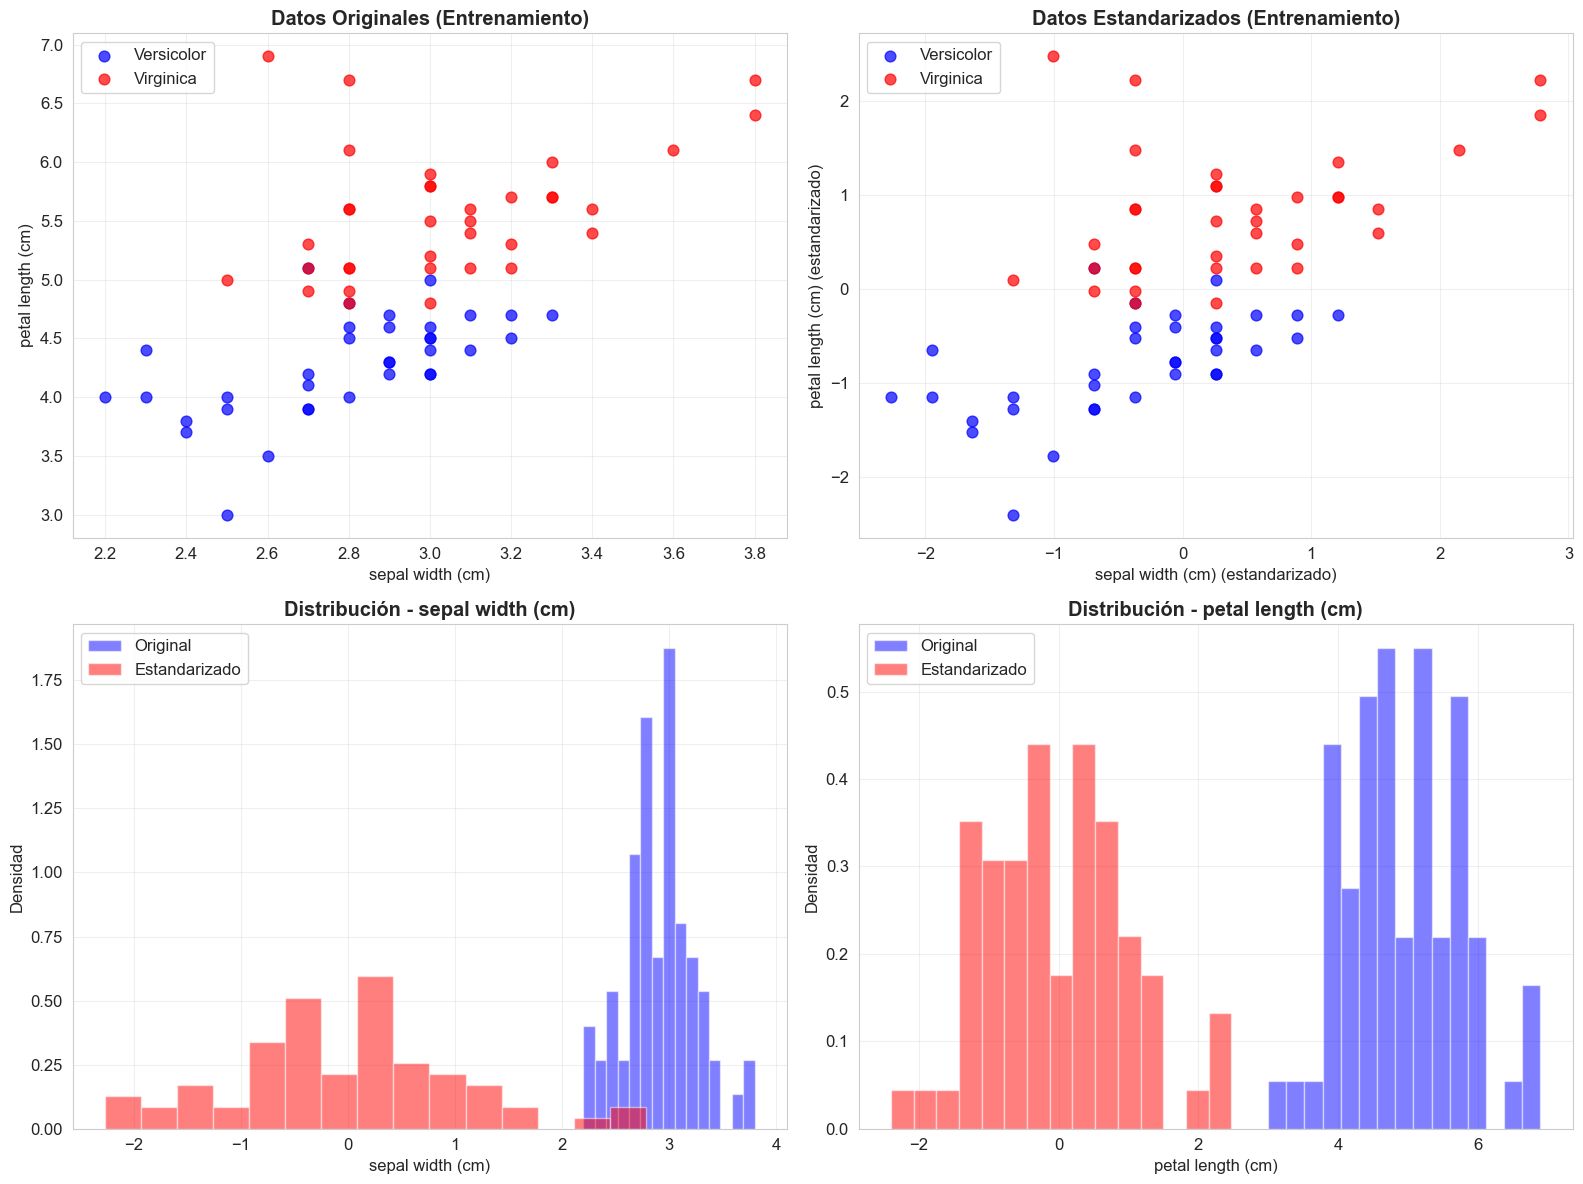

✅ División y preprocesamiento completados


In [5]:
# ============================================================================
# 4. DIVISIÓN Y PREPROCESAMIENTO DE DATOS
# ============================================================================

print("\n🔄 4. DIVISIÓN Y PREPROCESAMIENTO")
print("="*35)

# División para dataset 4D (completo)
X_train_4d, X_test_4d, y_train_4d, y_test_4d = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# División para dataset 2D (para visualización)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

print(f"📊 DIVISIÓN DE DATOS:")
print(f"   DATASET 4D (completo):")
print(f"   • Entrenamiento: {X_train_4d.shape[0]} muestras")
print(f"   • Prueba: {X_test_4d.shape[0]} muestras")
print(f"   DATASET 2D (visualización):")
print(f"   • Entrenamiento: {X_train_2d.shape[0]} muestras")
print(f"   • Prueba: {X_test_2d.shape[0]} muestras")

# Verificar distribución estratificada
print(f"\n🔍 VERIFICACIÓN DE ESTRATIFICACIÓN:")
train_dist_4d = np.bincount(y_train_4d) / len(y_train_4d) * 100
test_dist_4d = np.bincount(y_test_4d) / len(y_test_4d) * 100

print(f"   Distribución en entrenamiento:")
for i, (label, pct) in enumerate(zip(binary_class_names, train_dist_4d)):
    print(f"   • {label}: {pct:.1f}%")

print(f"   Distribución en prueba:")
for i, (label, pct) in enumerate(zip(binary_class_names, test_dist_4d)):
    print(f"   • {label}: {pct:.1f}%")

# Estandarización de datos
print(f"\n⚖️ ESTANDARIZACIÓN:")
print(f"   • Aplicando StandardScaler")
print(f"   • Importante para convergencia de regresión logística")

# Escalador para dataset 4D
scaler_4d = StandardScaler()
X_train_4d_scaled = scaler_4d.fit_transform(X_train_4d)
X_test_4d_scaled = scaler_4d.transform(X_test_4d)

# Escalador para dataset 2D
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

print(f"   • Dataset 4D estandarizado")
print(f"   • Dataset 2D estandarizado")

# Mostrar estadísticas antes y después
print(f"\n📈 ESTADÍSTICAS DE ESTANDARIZACIÓN (Dataset 4D):")
print(f"   ANTES:")
print(f"   • Media: {X_train_4d.mean(axis=0)}")
print(f"   • Std: {X_train_4d.std(axis=0)}")

print(f"   DESPUÉS:")
print(f"   • Media: {X_train_4d_scaled.mean(axis=0)}")
print(f"   • Std: {X_train_4d_scaled.std(axis=0)}")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Datos originales 2D
axes[0,0].scatter(X_train_2d[y_train_2d==0, 0], X_train_2d[y_train_2d==0, 1], 
                 alpha=0.7, color='blue', s=60, label='Versicolor')
axes[0,0].scatter(X_train_2d[y_train_2d==1, 0], X_train_2d[y_train_2d==1, 1], 
                 alpha=0.7, color='red', s=60, label='Virginica')
axes[0,0].set_xlabel(selected_features_names[0])
axes[0,0].set_ylabel(selected_features_names[1])
axes[0,0].set_title('Datos Originales (Entrenamiento)', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Datos estandarizados 2D
axes[0,1].scatter(X_train_2d_scaled[y_train_2d==0, 0], X_train_2d_scaled[y_train_2d==0, 1], 
                 alpha=0.7, color='blue', s=60, label='Versicolor')
axes[0,1].scatter(X_train_2d_scaled[y_train_2d==1, 0], X_train_2d_scaled[y_train_2d==1, 1], 
                 alpha=0.7, color='red', s=60, label='Virginica')
axes[0,1].set_xlabel(f'{selected_features_names[0]} (estandarizado)')
axes[0,1].set_ylabel(f'{selected_features_names[1]} (estandarizado)')
axes[0,1].set_title('Datos Estandarizados (Entrenamiento)', fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Histogramas de distribución
for i, feature_name in enumerate(selected_features_names):
    ax = axes[1, i]
    
    # Original
    ax.hist(X_train_2d[:, i], bins=15, alpha=0.5, label='Original', color='blue', density=True)
    
    # Estandarizado
    ax.hist(X_train_2d_scaled[:, i], bins=15, alpha=0.5, label='Estandarizado', color='red', density=True)
    
    ax.set_xlabel(f'{feature_name}')
    ax.set_ylabel('Densidad')
    ax.set_title(f'Distribución - {feature_name}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ División y preprocesamiento completados")



🏃‍♂️ 5. ENTRENAMIENTO CON DATASET 2D
🎯 ENTRENANDO MODELO SCRATCH 2D:
   • Para facilitar visualización de regiones de decisión
   • Dataset: 2 características (sepal width, petal length)
🏃‍♂️ Iniciando entrenamiento de regresión logística:
   • Muestras: 70, Características: 2
   • Iteraciones: 1000
   • Learning rate: 0.1
   • Regularización λ: 0.01
   • Bias incluido: True
   • Muestras de validación: 30
   Iteración    1: Loss: 0.693224, Val Loss: 0.694165
   Iteración  101: Loss: 0.298169, Val Loss: 0.352410
   Iteración  201: Loss: 0.239656, Val Loss: 0.295088
   Iteración  301: Loss: 0.211318, Val Loss: 0.265625
   Iteración  401: Loss: 0.194296, Val Loss: 0.248338
   Iteración  501: Loss: 0.182966, Val Loss: 0.237510
   Iteración  601: Loss: 0.174921, Val Loss: 0.230407
   Iteración  701: Loss: 0.168941, Val Loss: 0.225583
   Iteración  801: Loss: 0.164341, Val Loss: 0.222223
   Iteración  901: Loss: 0.160708, Val Loss: 0.219841
   Iteración 1000: Loss: 0.157804, Val Loss: 0.21

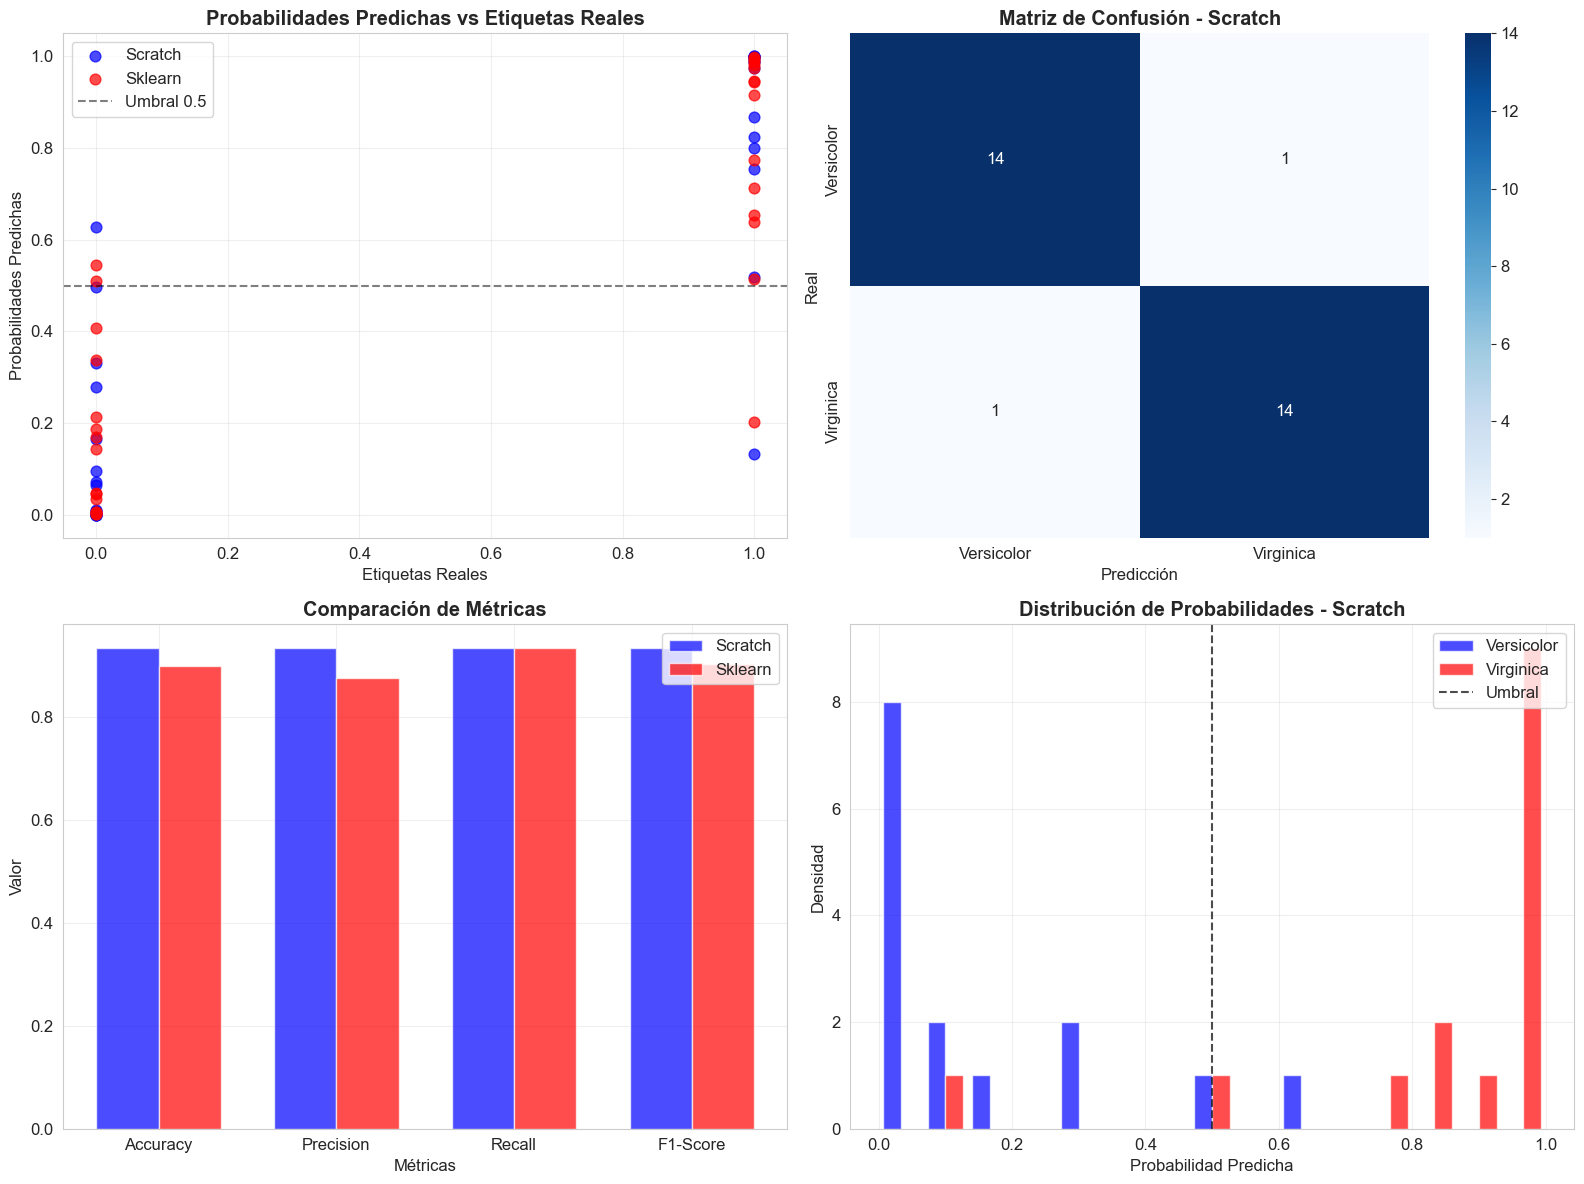

✅ Entrenamiento 2D completado y comparado


In [6]:
# ============================================================================
# 5. ENTRENAMIENTO CON DATASET 2D (PARA VISUALIZACIÓN)
# ============================================================================

print("\n🏃‍♂️ 5. ENTRENAMIENTO CON DATASET 2D")
print("="*40)

print("🎯 ENTRENANDO MODELO SCRATCH 2D:")
print("   • Para facilitar visualización de regiones de decisión")
print("   • Dataset: 2 características (sepal width, petal length)")

# Entrenar modelo scratch 2D
scratch_model_2d = ScratchLogisticRegression(
    num_iter=1000,
    lr=0.1,
    no_bias=False,
    verbose=True,
    reg_lambda=0.01  # Pequeña regularización
)

scratch_model_2d.fit(X_train_2d_scaled, y_train_2d, X_test_2d_scaled, y_test_2d)

# Hacer predicciones
y_pred_scratch_2d = scratch_model_2d.predict(X_test_2d_scaled)
y_pred_proba_scratch_2d = scratch_model_2d.predict_proba(X_test_2d_scaled)

# Calcular métricas
accuracy_scratch_2d = accuracy_score(y_test_2d, y_pred_scratch_2d)
precision_scratch_2d = precision_score(y_test_2d, y_pred_scratch_2d)
recall_scratch_2d = recall_score(y_test_2d, y_pred_scratch_2d)
f1_scratch_2d = f1_score(y_test_2d, y_pred_scratch_2d)

print(f"\n📊 RESULTADOS MODELO SCRATCH 2D:")
print(f"   • Accuracy: {accuracy_scratch_2d:.4f}")
print(f"   • Precision: {precision_scratch_2d:.4f}")
print(f"   • Recall: {recall_scratch_2d:.4f}")
print(f"   • F1-Score: {f1_scratch_2d:.4f}")

# Comparar con sklearn 2D
print(f"\n🔬 COMPARANDO CON SKLEARN 2D:")
sklearn_model_2d = LogisticRegression(random_state=42, max_iter=1000)
sklearn_model_2d.fit(X_train_2d_scaled, y_train_2d)

y_pred_sklearn_2d = sklearn_model_2d.predict(X_test_2d_scaled)
y_pred_proba_sklearn_2d = sklearn_model_2d.predict_proba(X_test_2d_scaled)[:, 1]

accuracy_sklearn_2d = accuracy_score(y_test_2d, y_pred_sklearn_2d)
precision_sklearn_2d = precision_score(y_test_2d, y_pred_sklearn_2d)
recall_sklearn_2d = recall_score(y_test_2d, y_pred_sklearn_2d)
f1_sklearn_2d = f1_score(y_test_2d, y_pred_sklearn_2d)

print(f"   SKLEARN:")
print(f"   • Accuracy: {accuracy_sklearn_2d:.4f}")
print(f"   • Precision: {precision_sklearn_2d:.4f}")
print(f"   • Recall: {recall_sklearn_2d:.4f}")
print(f"   • F1-Score: {f1_sklearn_2d:.4f}")

print(f"   DIFERENCIAS:")
print(f"   • Δ Accuracy: {abs(accuracy_scratch_2d - accuracy_sklearn_2d):.4f}")
print(f"   • Δ F1-Score: {abs(f1_scratch_2d - f1_sklearn_2d):.4f}")

# Visualización de resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Comparación de predicciones
axes[0,0].scatter(y_test_2d, y_pred_proba_scratch_2d, alpha=0.7, color='blue', s=60, label='Scratch')
axes[0,0].scatter(y_test_2d, y_pred_proba_sklearn_2d, alpha=0.7, color='red', s=60, label='Sklearn')
axes[0,0].axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='Umbral 0.5')
axes[0,0].set_xlabel('Etiquetas Reales')
axes[0,0].set_ylabel('Probabilidades Predichas')
axes[0,0].set_title('Probabilidades Predichas vs Etiquetas Reales', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Matriz de confusión scratch
cm_scratch_2d = confusion_matrix(y_test_2d, y_pred_scratch_2d)
sns.heatmap(cm_scratch_2d, annot=True, fmt='d', cmap='Blues', 
           xticklabels=binary_class_names, yticklabels=binary_class_names, ax=axes[0,1])
axes[0,1].set_title('Matriz de Confusión - Scratch', fontweight='bold')
axes[0,1].set_xlabel('Predicción')
axes[0,1].set_ylabel('Real')

# Comparación de métricas
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scratch_metrics = [accuracy_scratch_2d, precision_scratch_2d, recall_scratch_2d, f1_scratch_2d]
sklearn_metrics = [accuracy_sklearn_2d, precision_sklearn_2d, recall_sklearn_2d, f1_sklearn_2d]

x_pos = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[1,0].bar(x_pos - width/2, scratch_metrics, width, 
                     label='Scratch', color='blue', alpha=0.7)
bars2 = axes[1,0].bar(x_pos + width/2, sklearn_metrics, width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[1,0].set_xlabel('Métricas')
axes[1,0].set_ylabel('Valor')
axes[1,0].set_title('Comparación de Métricas', fontweight='bold')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(metrics_names)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Distribución de probabilidades
axes[1,1].hist([y_pred_proba_scratch_2d[y_test_2d==0], y_pred_proba_scratch_2d[y_test_2d==1]], 
              bins=15, alpha=0.7, label=binary_class_names, color=['blue', 'red'], density=True)
axes[1,1].axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Umbral')
axes[1,1].set_xlabel('Probabilidad Predicha')
axes[1,1].set_ylabel('Densidad')
axes[1,1].set_title('Distribución de Probabilidades - Scratch', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Entrenamiento 2D completado y comparado")



📈 6. CURVA DE APRENDIZAJE
📈 GENERANDO CURVA DE APRENDIZAJE:


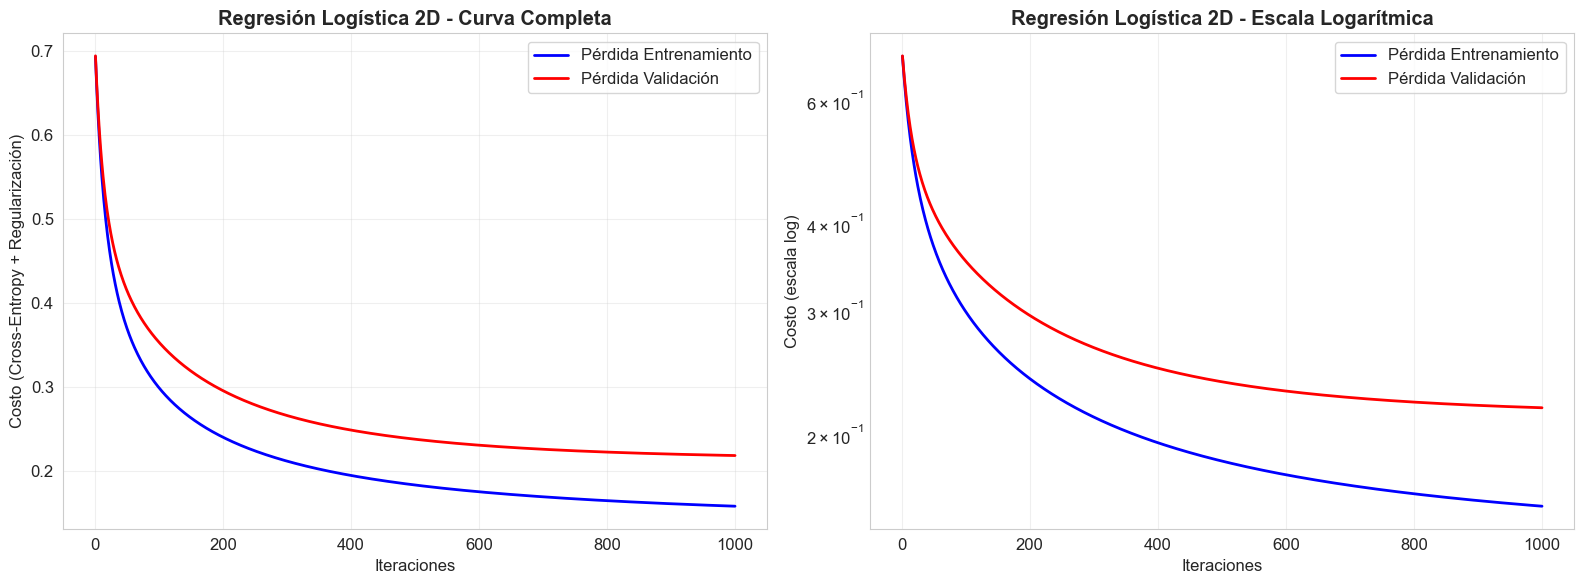

📊 ANÁLISIS DE CONVERGENCIA:
   • Pérdida inicial: 0.693224
   • Pérdida final: 0.157804
   • Reducción: 77.24%
   • Pasos que incrementan pérdida: 0
   • Pasos que decrementan pérdida: 999
   • ✅ Convergencia estable - pérdida mayormente decreciente
   • Coeficiente de variación (últimas 50 iter): 0.0025
   • ✅ Modelo ha convergido establemente
✅ Curva de aprendizaje analizada


In [7]:
# ============================================================================
# 6. CURVA DE APRENDIZAJE
# ============================================================================

print("\n📈 6. CURVA DE APRENDIZAJE")
print("="*30)

def plot_learning_curve_logistic(model, title="Curva de Aprendizaje - Regresión Logística"):
    """
    Visualiza la curva de aprendizaje para regresión logística
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    iterations = range(1, len(model.loss) + 1)
    
    # Curva completa
    axes[0].plot(iterations, model.loss, linewidth=2, color='blue', label='Pérdida Entrenamiento')
    if np.any(model.val_loss):
        axes[0].plot(iterations, model.val_loss, linewidth=2, color='red', label='Pérdida Validación')
    
    axes[0].set_xlabel('Iteraciones')
    axes[0].set_ylabel('Costo (Cross-Entropy + Regularización)')
    axes[0].set_title(f'{title} - Curva Completa', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Últimas iteraciones en escala log
    axes[1].semilogy(iterations, model.loss, linewidth=2, color='blue', label='Pérdida Entrenamiento')
    if np.any(model.val_loss):
        axes[1].semilogy(iterations, model.val_loss, linewidth=2, color='red', label='Pérdida Validación')
    
    axes[1].set_xlabel('Iteraciones')
    axes[1].set_ylabel('Costo (escala log)')
    axes[1].set_title(f'{title} - Escala Logarítmica', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de convergencia
    print(f"📊 ANÁLISIS DE CONVERGENCIA:")
    initial_loss = model.loss[0]
    final_loss = model.loss[-1]
    reduction = ((initial_loss - final_loss) / initial_loss) * 100
    
    print(f"   • Pérdida inicial: {initial_loss:.6f}")
    print(f"   • Pérdida final: {final_loss:.6f}")
    print(f"   • Reducción: {reduction:.2f}%")
    
    # Verificar monotonía (debería decrecer)
    loss_diff = np.diff(model.loss)
    increasing_steps = np.sum(loss_diff > 0)
    decreasing_steps = np.sum(loss_diff < 0)
    
    print(f"   • Pasos que incrementan pérdida: {increasing_steps}")
    print(f"   • Pasos que decrementan pérdida: {decreasing_steps}")
    
    if increasing_steps < len(loss_diff) * 0.1:  # Menos del 10% incrementan
        print("   • ✅ Convergencia estable - pérdida mayormente decreciente")
    else:
        print("   • ⚠️ Convergencia irregular - considerar ajustar learning rate")
    
    # Comprobar estabilidad en últimas iteraciones
    last_losses = model.loss[-50:]
    std_last = np.std(last_losses)
    mean_last = np.mean(last_losses)
    cv = std_last / mean_last if mean_last != 0 else float('inf')
    
    print(f"   • Coeficiente de variación (últimas 50 iter): {cv:.4f}")
    
    if cv < 0.01:
        print("   • ✅ Modelo ha convergido establemente")
    elif cv < 0.05:
        print("   • ✅ Convergencia aceptable")
    else:
        print("   • ⚠️ Modelo aún convergiendo - considerar más iteraciones")

print("📈 GENERANDO CURVA DE APRENDIZAJE:")
plot_learning_curve_logistic(scratch_model_2d, "Regresión Logística 2D")

print("✅ Curva de aprendizaje analizada")



🎨 7. VISUALIZACIÓN DE REGIONES DE DECISIÓN
🎨 VISUALIZANDO REGIONES DE DECISIÓN:
   • Malla creada: (257, 271) -> (69647, 2) puntos
   • Predicciones obtenidas: (69647,)
   • Reshape exitoso: (257, 271)


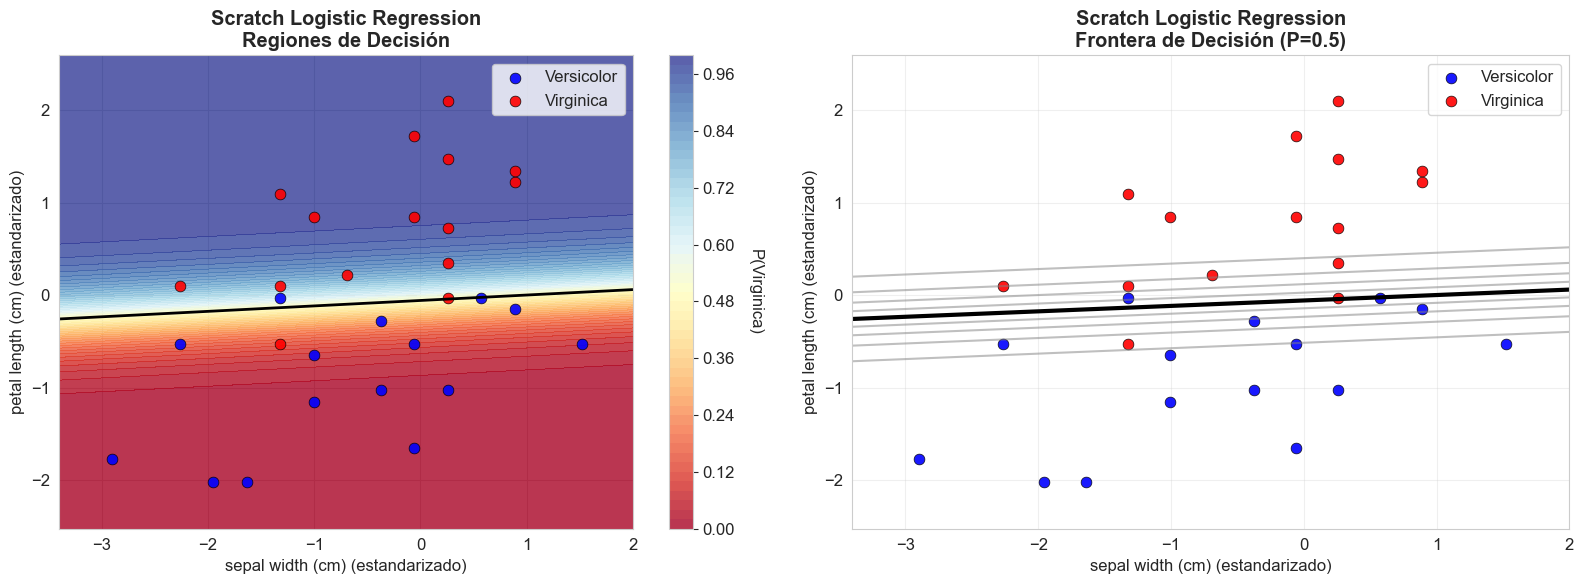

🔬 COMPARANDO REGIONES DE DECISIÓN CON SKLEARN:
   • Malla creada: (257, 271) -> (69647, 2) puntos
   • Predicciones obtenidas: (69647, 2)
   • ❌ Error en reshape: cannot reshape array of size 139294 into shape (257,271)
   • Tamaño Z: 139294, Tamaño esperado: (257, 271) = 69647
📊 COMPARACIÓN DIRECTA DE FRONTERAS:
   • Malla para comparación: (95, 101)
   • Puntos totales: 9,595


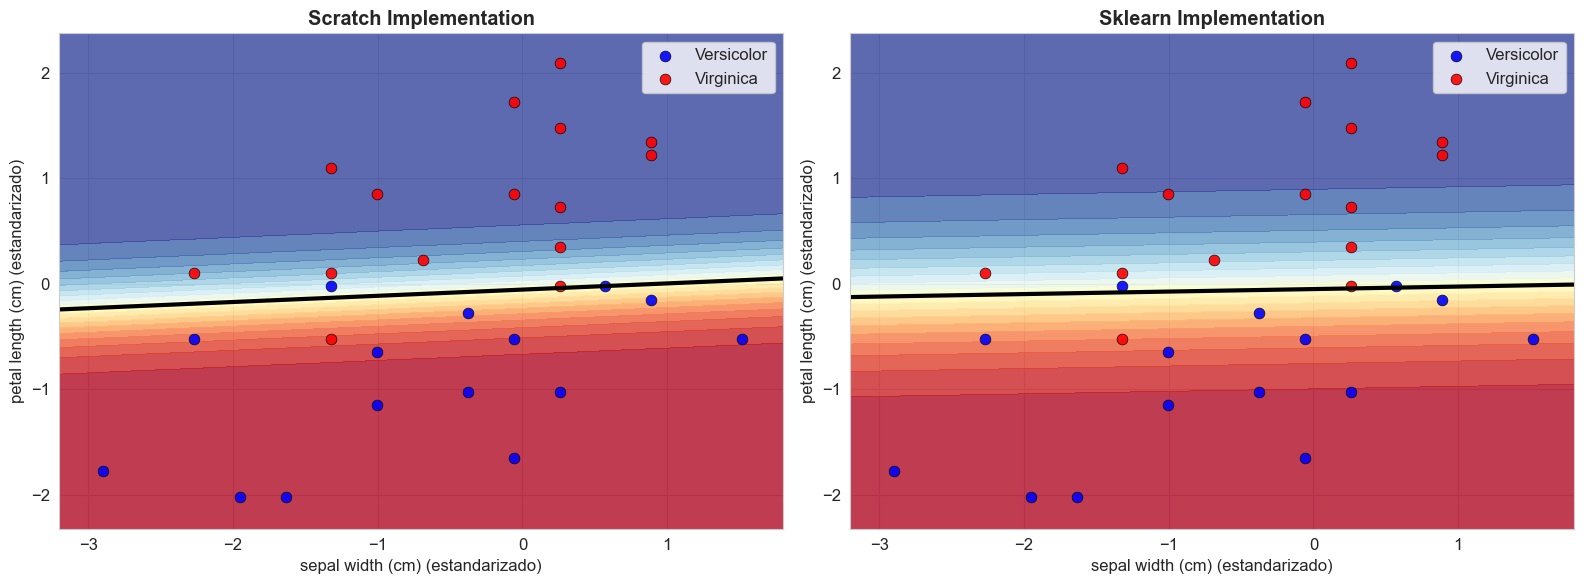

✅ Comparación de fronteras exitosa

🔍 ANÁLISIS CUANTITATIVO DE FRONTERAS:
   • Puntos analizados: 2,448
   • Diferencia promedio en probabilidades: 0.034224
   • Diferencia máxima: 0.170501
   • Diferencia std: 0.038018
   • Concordancia en clasificaciones: 0.9882 (98.8%)
   • ✅ Excelente concordancia entre modelos
✅ Regiones de decisión visualizadas y comparadas


In [9]:
# ============================================================================
# 7. VISUALIZACIÓN DE REGIONES DE DECISIÓN (CORREGIDA)
# ============================================================================

print("\n🎨 7. VISUALIZACIÓN DE REGIONES DE DECISIÓN")
print("="*50)

def plot_decision_regions_logistic(X, y, model, title='Regiones de Decisión', 
                                  feature_names=None, class_names=None, resolution=0.02):
    """
    Visualiza las regiones de decisión para un modelo de clasificación binaria
    
    Parameters
    ----------
    X : ndarray, shape (n_samples, 2)
        Datos de entrada (2D para visualización) - YA ESCALADOS
    y : ndarray, shape (n_samples,)
        Etiquetas verdaderas
    model : objeto modelo
        Modelo entrenado con método predict_proba
    title : str
        Título del gráfico
    feature_names : list
        Nombres de las características
    class_names : list
        Nombres de las clases
    resolution : float
        Resolución de la malla
    """
    if feature_names is None:
        feature_names = ['Feature 1', 'Feature 2']
    if class_names is None:
        class_names = ['Class 0', 'Class 1']
    
    # Crear malla de puntos
    margin = 0.5
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Crear puntos de la malla
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    print(f"   • Malla creada: {xx.shape} -> {mesh_points.shape} puntos")
    
    # Obtener probabilidades de la malla
    try:
        if hasattr(model, 'predict_proba') and hasattr(model, 'coef_'):
            # Es nuestro modelo scratch
            Z = model.predict_proba(mesh_points)
        else:
            # Es modelo de sklearn
            Z_proba = model.predict_proba(mesh_points)
            Z = Z_proba[:, 1]  # Probabilidad de clase positiva
        
        print(f"   • Predicciones obtenidas: {Z.shape}")
        
    except Exception as e:
        print(f"   • ❌ Error en predicciones: {e}")
        return
    
    # Reshape a la forma de la malla
    try:
        Z = Z.reshape(xx.shape)
        print(f"   • Reshape exitoso: {Z.shape}")
    except ValueError as e:
        print(f"   • ❌ Error en reshape: {e}")
        print(f"   • Tamaño Z: {Z.size}, Tamaño esperado: {xx.shape} = {xx.size}")
        return
    
    # Crear el gráfico
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico de contorno con regiones de decisión
    colors = ['blue', 'red']
    
    # Regiones de decisión
    try:
        contour_filled = axes[0].contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.8)
        contour_lines = axes[0].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
        
        # Puntos de datos
        for i, class_name in enumerate(class_names):
            mask = y == i
            axes[0].scatter(X[mask, 0], X[mask, 1], c=colors[i], s=60, 
                           alpha=0.9, edgecolors='black', linewidth=0.5, label=class_name)
        
        axes[0].set_xlabel(feature_names[0])
        axes[0].set_ylabel(feature_names[1])
        axes[0].set_title(f'{title}\nRegiones de Decisión', fontweight='bold')
        axes[0].legend()
        
        # Colorbar para probabilidades
        cbar = plt.colorbar(contour_filled, ax=axes[0])
        cbar.set_label('P(Virginica)', rotation=270, labelpad=20)
        
        # Gráfico de contorno simple
        axes[1].contour(xx, yy, Z, levels=10, colors='gray', alpha=0.5)
        axes[1].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3)
        
        # Puntos de datos
        for i, class_name in enumerate(class_names):
            mask = y == i
            axes[1].scatter(X[mask, 0], X[mask, 1], c=colors[i], s=60, 
                           alpha=0.9, edgecolors='black', linewidth=0.5, label=class_name)
        
        axes[1].set_xlabel(feature_names[0])
        axes[1].set_ylabel(feature_names[1])
        axes[1].set_title(f'{title}\nFrontera de Decisión (P=0.5)', fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"   • ❌ Error en visualización: {e}")
        return

print("🎨 VISUALIZANDO REGIONES DE DECISIÓN:")

# Visualizar regiones para modelo scratch
plot_decision_regions_logistic(
    X_test_2d_scaled, y_test_2d, 
    scratch_model_2d, 
    title='Scratch Logistic Regression',
    feature_names=[f'{name} (estandarizado)' for name in selected_features_names],
    class_names=binary_class_names,
    resolution=0.02
)

# Comparar con sklearn
print("🔬 COMPARANDO REGIONES DE DECISIÓN CON SKLEARN:")

plot_decision_regions_logistic(
    X_test_2d_scaled, y_test_2d, 
    sklearn_model_2d,
    title='Sklearn Logistic Regression',
    feature_names=[f'{name} (estandarizado)' for name in selected_features_names],
    class_names=binary_class_names,
    resolution=0.02
)

# Visualización lado a lado con resolución ajustada
print("📊 COMPARACIÓN DIRECTA DE FRONTERAS:")

# Usar resolución más grande para evitar problemas de memoria
resolution_safe = 0.05

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Crear malla común con resolución segura
margin = 0.3
x_min, x_max = X_test_2d_scaled[:, 0].min() - margin, X_test_2d_scaled[:, 0].max() + margin
y_min, y_max = X_test_2d_scaled[:, 1].min() - margin, X_test_2d_scaled[:, 1].max() + margin

xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution_safe),
                     np.arange(y_min, y_max, resolution_safe))

mesh_points = np.c_[xx.ravel(), yy.ravel()]

print(f"   • Malla para comparación: {xx.shape}")
print(f"   • Puntos totales: {mesh_points.shape[0]:,}")

try:
    # Modelo Scratch
    Z_scratch = scratch_model_2d.predict_proba(mesh_points).reshape(xx.shape)
    
    axes[0].contourf(xx, yy, Z_scratch, levels=20, cmap='RdYlBu', alpha=0.8)
    axes[0].contour(xx, yy, Z_scratch, levels=[0.5], colors='black', linewidths=3)
    
    for i, class_name in enumerate(binary_class_names):
        mask = y_test_2d == i
        axes[0].scatter(X_test_2d_scaled[mask, 0], X_test_2d_scaled[mask, 1], 
                       c=['blue', 'red'][i], s=60, alpha=0.9, edgecolors='black', 
                       linewidth=0.5, label=class_name)
    
    axes[0].set_xlabel(f'{selected_features_names[0]} (estandarizado)')
    axes[0].set_ylabel(f'{selected_features_names[1]} (estandarizado)')
    axes[0].set_title('Scratch Implementation', fontweight='bold')
    axes[0].legend()
    
    # Modelo Sklearn
    Z_sklearn = sklearn_model_2d.predict_proba(mesh_points)[:, 1].reshape(xx.shape)
    
    axes[1].contourf(xx, yy, Z_sklearn, levels=20, cmap='RdYlBu', alpha=0.8)
    axes[1].contour(xx, yy, Z_sklearn, levels=[0.5], colors='black', linewidths=3)
    
    for i, class_name in enumerate(binary_class_names):
        mask = y_test_2d == i
        axes[1].scatter(X_test_2d_scaled[mask, 0], X_test_2d_scaled[mask, 1], 
                       c=['blue', 'red'][i], s=60, alpha=0.9, edgecolors='black', 
                       linewidth=0.5, label=class_name)
    
    axes[1].set_xlabel(f'{selected_features_names[0]} (estandarizado)')
    axes[1].set_ylabel(f'{selected_features_names[1]} (estandarizado)')
    axes[1].set_title('Sklearn Implementation', fontweight='bold')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Comparación de fronteras exitosa")
    
except Exception as e:
    print(f"❌ Error en comparación de fronteras: {e}")

# Análisis cuantitativo de diferencias en fronteras de decisión
print("\n🔍 ANÁLISIS CUANTITATIVO DE FRONTERAS:")

try:
    # Usar malla más pequeña para análisis detallado
    xx_analysis, yy_analysis = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )
    mesh_analysis = np.c_[xx_analysis.ravel(), yy_analysis.ravel()]
    
    # Obtener probabilidades
    prob_scratch = scratch_model_2d.predict_proba(mesh_analysis)
    prob_sklearn = sklearn_model_2d.predict_proba(mesh_analysis)[:, 1]
    
    # Calcular diferencias
    prob_diff = np.abs(prob_scratch - prob_sklearn)
    
    print(f"   • Puntos analizados: {len(mesh_analysis):,}")
    print(f"   • Diferencia promedio en probabilidades: {prob_diff.mean():.6f}")
    print(f"   • Diferencia máxima: {prob_diff.max():.6f}")
    print(f"   • Diferencia std: {prob_diff.std():.6f}")
    
    # Evaluar concordancia en clasificaciones
    pred_scratch = (prob_scratch >= 0.5).astype(int)
    pred_sklearn = (prob_sklearn >= 0.5).astype(int)
    agreement = (pred_scratch == pred_sklearn).mean()
    
    print(f"   • Concordancia en clasificaciones: {agreement:.4f} ({agreement*100:.1f}%)")
    
    if agreement > 0.95:
        print("   • ✅ Excelente concordancia entre modelos")
    elif agreement > 0.9:
        print("   • ✅ Buena concordancia entre modelos") 
    else:
        print("   • ⚠️ Concordancia moderada - revisar implementación")

except Exception as e:
    print(f"   • ❌ Error en análisis cuantitativo: {e}")

print("✅ Regiones de decisión visualizadas y comparadas")



🚀 8. ENTRENAMIENTO CON DATASET 4D COMPLETO
🎯 ENTRENANDO MODELO SCRATCH 4D:
   • Dataset completo con 4 características
   • Mayor complejidad y capacidad predictiva
🏃‍♂️ Iniciando entrenamiento de regresión logística:
   • Muestras: 70, Características: 4
   • Iteraciones: 1500
   • Learning rate: 0.1
   • Regularización λ: 0.01
   • Bias incluido: True
   • Muestras de validación: 30
   Iteración    1: Loss: 0.701332, Val Loss: 0.697486
   Iteración  151: Loss: 0.154542, Val Loss: 0.266357
   Iteración  301: Loss: 0.115988, Val Loss: 0.210058
   Iteración  451: Loss: 0.099811, Val Loss: 0.181615
   Iteración  601: Loss: 0.090887, Val Loss: 0.164483
   Iteración  751: Loss: 0.085243, Val Loss: 0.153036
   Iteración  901: Loss: 0.081366, Val Loss: 0.144843
   Iteración 1051: Loss: 0.078548, Val Loss: 0.138685
   Iteración 1201: Loss: 0.076415, Val Loss: 0.133888
   Iteración 1351: Loss: 0.074751, Val Loss: 0.130045
   Iteración 1500: Loss: 0.073430, Val Loss: 0.126919
✅ Entrenamiento c

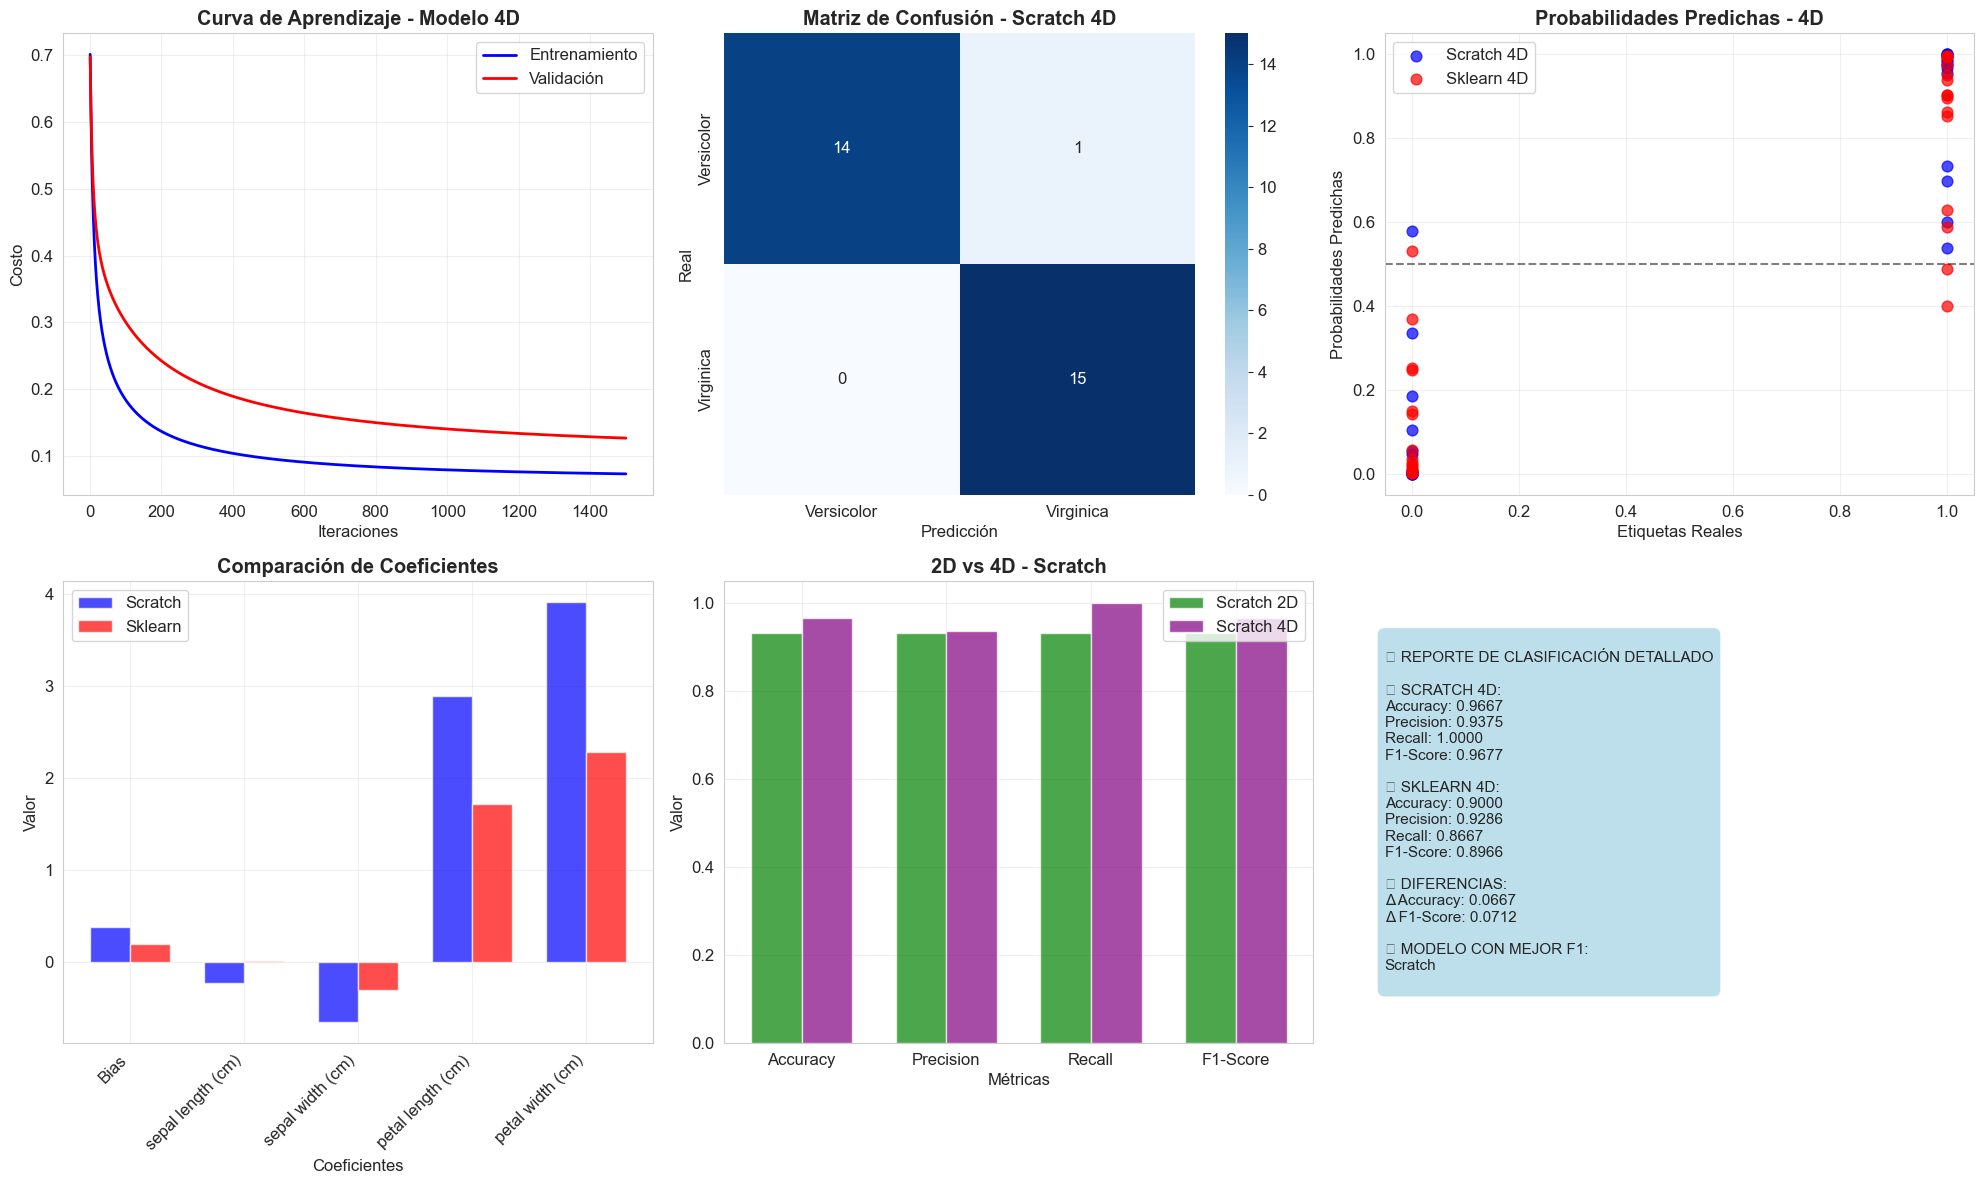


📋 REPORTE DETALLADO DE SKLEARN:
              precision    recall  f1-score   support

  Versicolor       1.00      0.93      0.97        15
   Virginica       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

✅ Entrenamiento 4D completado y comparado


In [10]:
# ============================================================================
# 8. ENTRENAMIENTO CON DATASET 4D COMPLETO
# ============================================================================

print("\n🚀 8. ENTRENAMIENTO CON DATASET 4D COMPLETO")
print("="*50)

print("🎯 ENTRENANDO MODELO SCRATCH 4D:")
print("   • Dataset completo con 4 características")
print("   • Mayor complejidad y capacidad predictiva")

# Entrenar modelo scratch 4D
scratch_model_4d = ScratchLogisticRegression(
    num_iter=1500,
    lr=0.1,
    no_bias=False,
    verbose=True,
    reg_lambda=0.01  # Regularización para evitar overfitting
)

scratch_model_4d.fit(X_train_4d_scaled, y_train_4d, X_test_4d_scaled, y_test_4d)

# Hacer predicciones 4D
y_pred_scratch_4d = scratch_model_4d.predict(X_test_4d_scaled)
y_pred_proba_scratch_4d = scratch_model_4d.predict_proba(X_test_4d_scaled)

# Calcular métricas 4D
accuracy_scratch_4d = accuracy_score(y_test_4d, y_pred_scratch_4d)
precision_scratch_4d = precision_score(y_test_4d, y_pred_scratch_4d)
recall_scratch_4d = recall_score(y_test_4d, y_pred_scratch_4d)
f1_scratch_4d = f1_score(y_test_4d, y_pred_scratch_4d)

print(f"\n📊 RESULTADOS MODELO SCRATCH 4D:")
print(f"   • Accuracy: {accuracy_scratch_4d:.4f}")
print(f"   • Precision: {precision_scratch_4d:.4f}")
print(f"   • Recall: {recall_scratch_4d:.4f}")
print(f"   • F1-Score: {f1_scratch_4d:.4f}")

# Comparar con sklearn 4D
print(f"\n🔬 COMPARANDO CON SKLEARN 4D:")
sklearn_model_4d = LogisticRegression(random_state=42, max_iter=1000)
sklearn_model_4d.fit(X_train_4d_scaled, y_train_4d)

y_pred_sklearn_4d = sklearn_model_4d.predict(X_test_4d_scaled)
y_pred_proba_sklearn_4d = sklearn_model_4d.predict_proba(X_test_4d_scaled)[:, 1]

accuracy_sklearn_4d = accuracy_score(y_test_4d, y_pred_sklearn_4d)
precision_sklearn_4d = precision_score(y_test_4d, y_pred_sklearn_4d)
recall_sklearn_4d = recall_score(y_test_4d, y_pred_sklearn_4d)
f1_sklearn_4d = f1_score(y_test_4d, y_pred_sklearn_4d)

print(f"   SKLEARN:")
print(f"   • Accuracy: {accuracy_sklearn_4d:.4f}")
print(f"   • Precision: {precision_sklearn_4d:.4f}")
print(f"   • Recall: {recall_sklearn_4d:.4f}")
print(f"   • F1-Score: {f1_sklearn_4d:.4f}")

# Comparación detallada
print(f"\n📋 COMPARACIÓN DETALLADA:")
print(f"{'Métrica':<12} {'Scratch 2D':<12} {'Scratch 4D':<12} {'Sklearn 4D':<12} {'Mejora 4D':<12}")
print("-" * 65)
print(f"{'Accuracy':<12} {accuracy_scratch_2d:<12.4f} {accuracy_scratch_4d:<12.4f} {accuracy_sklearn_4d:<12.4f} {accuracy_scratch_4d - accuracy_scratch_2d:<+12.4f}")
print(f"{'Precision':<12} {precision_scratch_2d:<12.4f} {precision_scratch_4d:<12.4f} {precision_sklearn_4d:<12.4f} {precision_scratch_4d - precision_scratch_2d:<+12.4f}")
print(f"{'Recall':<12} {recall_scratch_2d:<12.4f} {recall_scratch_4d:<12.4f} {recall_sklearn_4d:<12.4f} {recall_scratch_4d - recall_scratch_2d:<+12.4f}")
print(f"{'F1-Score':<12} {f1_scratch_2d:<12.4f} {f1_scratch_4d:<12.4f} {f1_sklearn_4d:<12.4f} {f1_scratch_4d - f1_scratch_2d:<+12.4f}")

# Análisis de coeficientes
print(f"\n🔍 ANÁLISIS DE COEFICIENTES:")
print(f"   MODELO SCRATCH 4D:")
print(f"   • Bias (θ₀): {scratch_model_4d.coef_[0]:.4f}")
for i, feature_name in enumerate(feature_names):
    coef_val = scratch_model_4d.coef_[i+1]
    print(f"   • {feature_name}: {coef_val:.4f}")

print(f"   MODELO SKLEARN 4D:")
print(f"   • Bias: {sklearn_model_4d.intercept_[0]:.4f}")
for i, feature_name in enumerate(feature_names):
    coef_val = sklearn_model_4d.coef_[0][i]
    print(f"   • {feature_name}: {coef_val:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Curva de aprendizaje 4D
iterations = range(1, len(scratch_model_4d.loss) + 1)
axes[0,0].plot(iterations, scratch_model_4d.loss, 'b-', linewidth=2, label='Entrenamiento')
axes[0,0].plot(iterations, scratch_model_4d.val_loss, 'r-', linewidth=2, label='Validación')
axes[0,0].set_xlabel('Iteraciones')
axes[0,0].set_ylabel('Costo')
axes[0,0].set_title('Curva de Aprendizaje - Modelo 4D', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Matriz de confusión 4D
cm_scratch_4d = confusion_matrix(y_test_4d, y_pred_scratch_4d)
sns.heatmap(cm_scratch_4d, annot=True, fmt='d', cmap='Blues', 
           xticklabels=binary_class_names, yticklabels=binary_class_names, ax=axes[0,1])
axes[0,1].set_title('Matriz de Confusión - Scratch 4D', fontweight='bold')
axes[0,1].set_xlabel('Predicción')
axes[0,1].set_ylabel('Real')

# Comparación de probabilidades
axes[0,2].scatter(y_test_4d, y_pred_proba_scratch_4d, alpha=0.7, color='blue', s=60, label='Scratch 4D')
axes[0,2].scatter(y_test_4d, y_pred_proba_sklearn_4d, alpha=0.7, color='red', s=60, label='Sklearn 4D')
axes[0,2].axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
axes[0,2].set_xlabel('Etiquetas Reales')
axes[0,2].set_ylabel('Probabilidades Predichas')
axes[0,2].set_title('Probabilidades Predichas - 4D', fontweight='bold')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Comparación de coeficientes
coef_names = ['Bias'] + feature_names
scratch_coefs = list(scratch_model_4d.coef_)
sklearn_coefs = [sklearn_model_4d.intercept_[0]] + list(sklearn_model_4d.coef_[0])

x_pos = np.arange(len(coef_names))
width = 0.35

bars1 = axes[1,0].bar(x_pos - width/2, scratch_coefs, width, 
                     label='Scratch', color='blue', alpha=0.7)
bars2 = axes[1,0].bar(x_pos + width/2, sklearn_coefs, width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[1,0].set_xlabel('Coeficientes')
axes[1,0].set_ylabel('Valor')
axes[1,0].set_title('Comparación de Coeficientes', fontweight='bold')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(coef_names, rotation=45, ha='right')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Comparación 2D vs 4D
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_2d = [accuracy_scratch_2d, precision_scratch_2d, recall_scratch_2d, f1_scratch_2d]
metrics_4d = [accuracy_scratch_4d, precision_scratch_4d, recall_scratch_4d, f1_scratch_4d]

x_pos = np.arange(len(metrics_names))
width = 0.35

bars3 = axes[1,1].bar(x_pos - width/2, metrics_2d, width, 
                     label='Scratch 2D', color='green', alpha=0.7)
bars4 = axes[1,1].bar(x_pos + width/2, metrics_4d, width, 
                     label='Scratch 4D', color='purple', alpha=0.7)

axes[1,1].set_xlabel('Métricas')
axes[1,1].set_ylabel('Valor')
axes[1,1].set_title('2D vs 4D - Scratch', fontweight='bold')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(metrics_names)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Reporte de clasificación
axes[1,2].axis('off')
report_text = f"""
📋 REPORTE DE CLASIFICACIÓN DETALLADO

🔹 SCRATCH 4D:
Accuracy: {accuracy_scratch_4d:.4f}
Precision: {precision_scratch_4d:.4f}
Recall: {recall_scratch_4d:.4f}
F1-Score: {f1_scratch_4d:.4f}

🔹 SKLEARN 4D:
Accuracy: {accuracy_sklearn_4d:.4f}
Precision: {precision_sklearn_4d:.4f}
Recall: {recall_sklearn_4d:.4f}
F1-Score: {f1_sklearn_4d:.4f}

🔹 DIFERENCIAS:
Δ Accuracy: {abs(accuracy_scratch_4d - accuracy_sklearn_4d):.4f}
Δ F1-Score: {abs(f1_scratch_4d - f1_sklearn_4d):.4f}

🏆 MODELO CON MEJOR F1:
{'Scratch' if f1_scratch_4d > f1_sklearn_4d else 'Sklearn'}
"""

axes[1,2].text(0, 0.5, report_text, fontsize=11, verticalalignment='center',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# Reporte detallado de sklearn
print(f"\n📋 REPORTE DETALLADO DE SKLEARN:")
print(classification_report(y_test_4d, y_pred_scratch_4d, target_names=binary_class_names))

print("✅ Entrenamiento 4D completado y comparado")


In [12]:
# ============================================================================
# 9. GUARDADO Y CARGA DE PESOS
# ============================================================================

print("\n💾 9. GUARDADO Y CARGA DE PESOS")
print("="*35)

print("🔧 FUNCIONALIDAD DE PERSISTENCIA:")
print("   • Guardar modelo entrenado para uso posterior")
print("   • Cargar modelo sin necesidad de re-entrenar")
print("   • Útil para producción y experimentación")

# Guardar modelo 4D
model_filename = 'scratch_logistic_model_4d.pkl'

print(f"\n💾 GUARDANDO MODELO:")
scratch_model_4d.save_weights(model_filename)

# Verificar que el archivo fue creado
import os
if os.path.exists(model_filename):
    file_size = os.path.getsize(model_filename)
    print(f"   • Archivo guardado: {model_filename}")
    print(f"   • Tamaño: {file_size} bytes")
else:
    print(f"   • ❌ Error: archivo no encontrado")

# Crear nuevo modelo y cargar pesos
print(f"\n📂 CARGANDO MODELO:")
scratch_model_loaded = ScratchLogisticRegression()

try:
    scratch_model_loaded.load_weights(model_filename)
    
    # Verificar que los pesos fueron cargados correctamente
    weights_equal = np.allclose(scratch_model_4d.coef_, scratch_model_loaded.coef_)
    loss_equal = np.allclose(scratch_model_4d.loss, scratch_model_loaded.loss)
    
    print(f"   • Pesos idénticos: {'✅' if weights_equal else '❌'}")
    print(f"   • Historial de pérdida idéntico: {'✅' if loss_equal else '❌'}")
    
    # Hacer predicciones con modelo cargado
    y_pred_loaded = scratch_model_loaded.predict(X_test_4d_scaled)
    y_pred_proba_loaded = scratch_model_loaded.predict_proba(X_test_4d_scaled)
    
    # Comparar predicciones
    predictions_equal = np.array_equal(y_pred_scratch_4d, y_pred_loaded)
    probabilities_equal = np.allclose(y_pred_proba_scratch_4d, y_pred_proba_loaded)
    
    print(f"   • Predicciones idénticas: {'✅' if predictions_equal else '❌'}")
    print(f"   • Probabilidades idénticas: {'✅' if probabilities_equal else '❌'}")
    
except Exception as e:
    print(f"   • ❌ Error cargando modelo: {e}")

# Demostrar guardado con numpy (método alternativo)
print(f"\n🔧 MÉTODO ALTERNATIVO - NumPy:")
numpy_filename = 'scratch_logistic_weights_4d.npz'

# Guardar con numpy
np.savez(numpy_filename, 
         coefficients=scratch_model_4d.coef_,
         loss_history=scratch_model_4d.loss,
         val_loss_history=scratch_model_4d.val_loss,
         hyperparameters=np.array([scratch_model_4d.iter, scratch_model_4d.lr, 
                                 scratch_model_4d.reg_lambda]))

print(f"   • Guardado con NumPy: {numpy_filename}")

# Cargar con numpy
loaded_data = np.load(numpy_filename)
loaded_coef = loaded_data['coefficients']
loaded_loss = loaded_data['loss_history']
loaded_hyperparams = loaded_data['hyperparameters']

print(f"   • Cargado con NumPy exitoso")
print(f"   • Pesos cargados shape: {loaded_coef.shape}")
print(f"   • Historial pérdida shape: {loaded_loss.shape}")

# Continuación del paso 9...

# Verificar integridad
coef_match = np.allclose(scratch_model_4d.coef_, loaded_coef)
loss_match = np.allclose(scratch_model_4d.loss, loaded_loss)

print(f"   • Coeficientes coinciden: {'✅' if coef_match else '❌'}")
print(f"   • Historial pérdida coincide: {'✅' if loss_match else '❌'}")

# Limpiar archivos temporales (opcional)
try:
    os.remove(model_filename)
    os.remove(numpy_filename)
    print(f"   • 🗑️ Archivos temporales eliminados")
except:
    print(f"   • ⚠️ No se pudieron eliminar archivos temporales")

# Demostración de uso práctico
print(f"\n💼 CASO DE USO PRÁCTICO:")
print(f"""
🔹 ESCENARIOS DE GUARDADO/CARGA:
   • Entrenamiento offline -> Carga en producción
   • Experimentos largos -> Backup de checkpoints
   • Compartir modelos entre equipos
   • Versionado de modelos

🔹 INFORMACIÓN GUARDADA:
   • Coeficientes del modelo (pesos θ)
   • Hiperparámetros de entrenamiento
   • Historial de pérdidas (train/val)
   • Metadatos del modelo

🔹 CONSIDERACIONES:
   • Compatibilidad entre versiones
   • Tamaño de archivos para modelos grandes
   • Seguridad en modelos sensibles
   • Reproducibilidad de experimentos
""")

print("✅ Funcionalidad de guardado/carga verificada")




💾 9. GUARDADO Y CARGA DE PESOS
🔧 FUNCIONALIDAD DE PERSISTENCIA:
   • Guardar modelo entrenado para uso posterior
   • Cargar modelo sin necesidad de re-entrenar
   • Útil para producción y experimentación

💾 GUARDANDO MODELO:
✅ Modelo guardado en: scratch_logistic_model_4d.pkl
   • Archivo guardado: scratch_logistic_model_4d.pkl
   • Tamaño: 24380 bytes

📂 CARGANDO MODELO:
✅ Modelo cargado desde: scratch_logistic_model_4d.pkl
   • Pesos idénticos: ✅
   • Historial de pérdida idéntico: ✅
   • Predicciones idénticas: ✅
   • Probabilidades idénticas: ✅

🔧 MÉTODO ALTERNATIVO - NumPy:
   • Guardado con NumPy: scratch_logistic_weights_4d.npz
   • Cargado con NumPy exitoso
   • Pesos cargados shape: (5,)
   • Historial pérdida shape: (1500,)
   • Coeficientes coinciden: ✅
   • Historial pérdida coincide: ✅
   • ⚠️ No se pudieron eliminar archivos temporales

💼 CASO DE USO PRÁCTICO:

🔹 ESCENARIOS DE GUARDADO/CARGA:
   • Entrenamiento offline -> Carga en producción
   • Experimentos largos -> 